In [1]:
%pylab inline
import numpy as np
from scipy import *

Populating the interactive namespace from numpy and matplotlib


## Review of linear algebra

This notebook is a quick review of the concepts and notation of linear algebra and their implementation in the python library `numpy`.

It is not intended as a course in linear algebra. For an excellent elementary introduction to vectors and linear algebra, see [Gilbert Strang's course on linear algebra](http://web.mit.edu/18.06/www/videos.shtml)

## Vectors
Vectors spaces are the at the basis of linear algebra. They can be used to describe many things: from points in the plane, to time series to the configuration of electrons in an atom. This notebook is a brief review of some of the main concepts regarding vectors in finite dimensional Euclidean space. 

### Vector notation

* We will denote vectors by letters with a little arrow on top: $\vec{a},\vec{b},\vec{v}_1,\vec{v}_2,\ldots$

* Vectors are grouped by **dimension (d)**, the set of all $d$ dimensional (euclidean) vectors is denoted $R^d$.

* A 2D vector is an element of $R^2$ and is described by a sequence of two real numbers: $\vec{a} = [1,\pi]$ or $\vec{b}=[-1.56,1.2]$

* A 3D vector is an element of $R^3$ and is described by a sequence of three real numbers: $\vec{a} = [1,\pi,-\pi]$ or $\vec{b}=[-1.56,1.2,0]$

* A $d$ dimensional vector is an element of $R^d$ and is described by a sequence of $d$ real numbers: $\vec{a} = [a_1,a_2,\ldots,a_d]$

### Lists vs Numpy Arrays

The numpy library (we will reference it by np) is the workhorse library for linear algebra in python.  To creat a vector simply surround a python list ($[1,2,3]$) with the np.array function:

In [2]:
x_vector = np.array([1,2,3])
print x_vector

[1 2 3]


The function `np.array` converts a python list and converts it to an array:

In [3]:
c_list = [1,2]
print "The list:",c_list
print "Has length:", len(c_list)

c_vector = np.array(c_list)
print "The vector:", c_vector
print "Has shape:",c_vector.shape

The list: [1, 2]
Has length: 2
The vector: [1 2]
Has shape: (2,)


In [4]:
z = [5,6]   # a list
print "This is a list, not an array:",z
print type(z)

This is a list, not an array: [5, 6]
<type 'list'>


In [5]:
zarray = np.array(z)
print "This is an array, not a list",zarray
print type(zarray)

This is an array, not a list [5 6]
<type 'numpy.ndarray'>


### Arrays as Vectors
One way to define vectors in numpy is to use a one dimensional array.

In [6]:
v1=np.array([1,2])
v2=np.array([-1,1])
print v1,v2

[1 2] [-1  1]


#### Vector dimension vs. Array dimension

The word **dimension** has two different meanings in this context.

* The array `np.array([1,2,3,4])` **defines a vector** in $R^4$, i.e. a vector of dimension $d$ 

* The array `np.array([1,2,3,4])` **is** a 1D array, which is a list of numbers.

* The array `np.array([[1,2],[3,4]])` is a 2D array, which is a rectangle of numbers.
* A 2D array is also called a **Matrix** (more about those later)

In [7]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

### Visualizing 2D vectors.
The world that we see and experience is three dimensional. Therefor vectors in $R^3$ can be visualized. The screen you are looking at is 2D, which makes it particularly easy to visualize 2D vectors.

Vectors are commonly represented by arrows. The tail of the arrow is at zero, and the $(x,y)$ coordinates of the head of the arrow correspond to the two components of the vector: $\vec{a} = [a_1,a_2]$ 

In [8]:
import matplotlib.pyplot as plt
from numpy.linalg import norm
text_loc=1.1
def plot_arrows(L,scale=4,text_loc=0.2,fontsize=12):
    """ Plot a list of arrows. Each arrow defined by start and end points and a color and optionally text"""
    #plt.axis('equal')
    plt.figure(figsize=[6,6])
    plt.xlim([-scale,scale])
    plt.ylim([-scale,scale])
    ax = plt.axes()
    plt.xlabel('1st coord (x)')
    plt.ylabel('2nd coord (y)')

    for A in L:
        s,e,c=A[:3]
        ax.arrow(s[0], s[1], e[0], e[1], head_width=0.05*scale, head_length=0.1*scale, fc=c, ec=c,length_includes_head=True);
        if len(A)==4:
            t=A[3]
            _loc=1+text_loc/norm(e)
            ax.text(_loc*e[0],_loc*e[1],t,fontsize=fontsize)
    plt.grid()
    return ax
zero=np.array([0,0])

Here are a few examples:

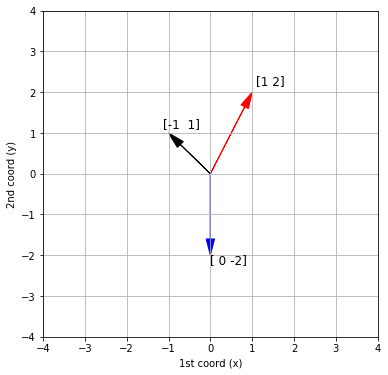

In [9]:
v1=np.array([1,2])
v2=np.array([-1,1])
v3=np.array([0,-2])
plot_arrows([[zero,v1,'r',str(v1)],[zero,v2,'k',str(v2)],[zero,v3,'b',str(v3)]]);

### Operations on Vectors
Vectors (represented as 1D arrays) can be added, inverted, and multiplied by a scalar

In [10]:
print 'v1=',v1,'v2=',v2
print 'v1+v2=',v1+v2
print '4*v1=',4*v2
print '-v1=',-v1

v1= [1 2] v2= [-1  1]
v1+v2= [0 3]
4*v1= [-4  4]
-v1= [-1 -2]


v1= [1 2] v2= [-1  1]
the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2


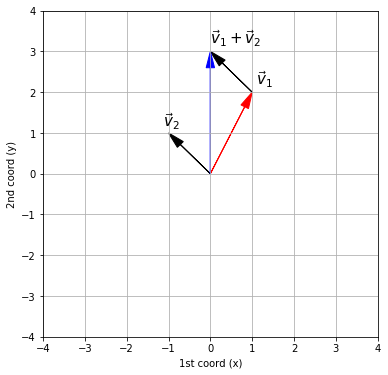

In [11]:
# A visualization of the sum of two 2D vectors.
v1=np.array([1,2])
v2=np.array([-1,1])
print 'v1=',v1,'v2=',v2
print "the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2"
plot_arrows([[zero,v1,'r','$\\vec{v}_1$'],[zero,v2,'k','$\\vec{v}_2$'],[v1,v2,'k'],[zero,v1+v2,'b','$\\vec{v}_1+\\vec{v}_2$']],fontsize=15);

In [27]:
#Two vectors can be summed only if they have the same dimension:
np.array([1,1])+np.array([1,1,1])

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [ ]:
v=np.array([1,2])
c=-.5
print 'v=',v1,'c=',c
print "the red arrow is v, the black arrow is %4.2f*v"%c
plot_arrows([[zero,v1,'r','$\\vec{v}$'],[zero,c*v1,'k',"%4.2f$\\vec{v}$"%c]],text_loc=0.3,scale=3);

### The inner product
The **inner product** or **dot product** is an operation that takes as input two vectors of the same dimension, and outputs a number (a scalar). The mathematical notation for the dot product of the vectors $\vec{a}$ and $\vec{b}$ is $\vec{a} \cdot \vec{b}$

In [28]:
print "three ways to calculate the dot product of ",v1,v2,'all give the same result:'
print np.dot(v1,v2),
print v1[0]*v2[0] + v1[1]*v2[1],
print sum([v1[i]*v2[i] for i in range(len(v1))])

three ways to calculate the dot product of  [1 2] [-1  1] all give the same result:
1 1 1


### The norm of a vector
The **length** or **norm** of a vector is the distance between the origin, where the vectors starts, and it's tip. The norm of a vector can be calculated by taking the square-root of the dot product of the vector with itself:
$$\| \vec{v} \| = \sqrt{\sum_i v_i^2} = \sqrt{\vec{v}\cdot\vec{v}}$$

In [29]:
from numpy.linalg import norm
from math import sqrt
print "two ways of calculating the norm of the vector",v1
print sqrt(np.dot(v1,v1)),
print norm(v1)

two ways of calculating the norm of the vector [1 2]
2.2360679775 2.2360679775


### Unit vectors
Of particular importance are vectors whose norm is **1**, such vectors are called *unit vectors*

Any vector can be *normalized* to have unit length by dividing the vector by its norm.

In the cell below we set `u1` to be the normalized version of `v1`

In [30]:
u1=v1/norm(v1)
print 'v1=',v1,'u1=',u1
print 'the norm of u1 is:',norm(u1)

v1= [1 2] u1= [ 0.4472136   0.89442719]
the norm of u1 is: 1.0


### Projections
Taking the dot product of an arbitrary vector `v2` with a unit vector `u1` has a simple geometric interpretation

In [31]:
p=u1*np.dot(u1,v2)
print p

[ 0.2  0.4]


The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)


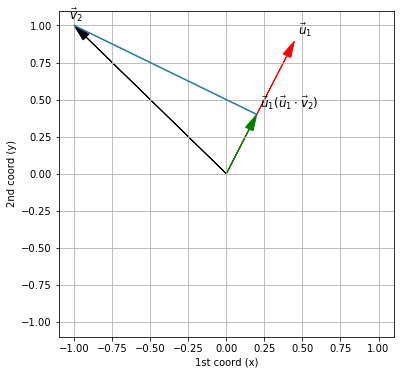

In [32]:
print """The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)"""
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,v2,'k','$\\vec{v}_2$'],\
                [zero,p,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v}_2)$"]],\
               scale=1.1,text_loc=0.05)
ax.plot([v2[0],p[0]],[v2[1],p[1]]);

### Orthogonal vectors
Two vectors are orthogonal if their dot product is zero.

Equivalently, two vectors are orthogonal if the angle between them is 90 degrees.

black vector= [2 2] red_vector= [-1  1]
np.dot(a,b)= 0


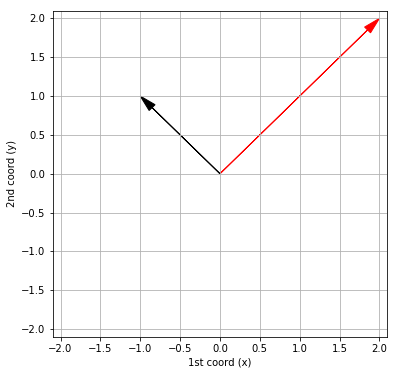

In [33]:
a=np.array([2,2])
b=np.array([-1,1])
print 'black vector=',a,'red_vector=',b
print 'np.dot(a,b)=',np.dot(a,b)
plot_arrows([[zero,a,'r'],[zero,b,'k']],scale=2.1);

## Orthonormal basis
We say that the vectors $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d \in R^d$ form an **orthonormal basis** of $R^d$. If:

**Normality:** $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d$ are unit vectors: $\forall 1 \leq i \leq d: \vec{u}_i \cdot \vec{u}_i =1 $

**Orthogonality:** Every pair of vectors are orthogonal: 
$\forall 1 \leq i\neq j \leq d: \vec{u}_i \cdot \vec{u}_j =0 $

### The Standard basis
The standard basis is: $\vec{e}_1 = [1,0,0,\ldots,0], \vec{e}_2 = [0,1,0,\ldots,0],\ldots, \vec{e}_d = [0,0,0,\ldots,1]$

The dot product of a vector $\vec{v}$ with a standard basis vector $\vec{e}_i$ is equal to the $i$th coordinate of $\vec{v}$, which we denote by $v_i$

In [34]:
v=np.array([5,6,3,4])
e2=np.array([0,1,0,0])
np.dot(v,e2)

6

### Reconstruction using an orthonormal basis
Orthonormal basis define a *coordinate system* and allow us to move between coordinate systems.

An orthonormal basis $\vec{u}_1,\ldots,\vec{u}_d$ can be used to represent any vector $\vec{v}$ in the following way. 

* $\vec{v}$ is **represented** as a list of $d$ dot products: $$[\vec{v}\cdot\vec{u_1},\vec{v}\cdot\vec{u_2},\ldots,\vec{v}\cdot\vec{u_d}]$$

* $\vec{v}$ is **reconstructed** by summing its projections on the basis vectors:
$$\vec{v} = (\vec{v}\cdot\vec{u_1})\vec{u_1} + (\vec{v}\cdot\vec{u_2})\vec{u_2} + \cdots + (\vec{v}\cdot\vec{u_d})\vec{u_d}$$

* Representing a vector $\vec{v}$ using the **standard** basis is yields the representation $[v_1,v_2,\ldots,v_d]$

* Representing $\vec{v}$ using an orthonormal basis is called a **change of basis**

### Visualizing change of basis
It is instructive to visualize a change of basis in $R^2$

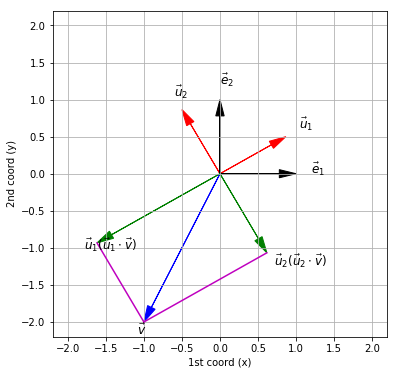

In [35]:
from math import sin,cos
v=np.array([-1,-2])
e1=np.array([1,0])
e2=np.array([0,1])
angle=np.pi/6.0 # 30 degrees
u1=np.array([cos(angle),sin(angle)])
u2=np.array([-sin(angle),cos(angle)])
v,e1,e2,u1,u2
p1=u1*np.dot(u1,v)
p2=u2*np.dot(u2,v)
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,u2,'r','$\\vec{u}_2$'],
               [zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=2.2,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');

### Excercises
* For each task below, create a function that plots a visualization of the operation and return the result of the operation.

1. Write a function that computes the projection of $\vec{v}$ on $\vec{e}_1=[1,0]$
1. Write a function that computes the projection of $\vec{v}$ on $\vec{e}_2=[0,1]$

<img style="float: right;" src="images/Matrix.svg.png">
## Matrix notation
<a href="https://en.wikipedia.org/wiki/Matrix_(mathematics)">Matrix Notation</a> is a notation systems that for a succinct representation of repetitive operations, such as a change of basis.

Recall that a **vector** can be represented as a one dimensional array of numbers. A **matrix** is a two dimensional rectangle of numbers. A matrix consists of rows, indexed from the top to the bottom and of columns, indexed from the left to the right. As is described in the  figure.

A matrix with $n$ rows and $m$ columns is said to be an "$m$ by $n$ matrix".
In numpy we will say that the **shape** of the matrix is $(m,n)$. We will also use the LaTeX notation $M_{m \times n}$ to indicate that $M$ is an $m \times n$ matrix.

In [36]:
# The .reshape command reorganized the elements of a matrix into a new shape
A = np.array(range(6))
print 'A=',A
B=A.reshape(2,3)
print "B is a 2X3 matrix:\n",B
print "the shape of B is:",B.shape
print "The transpose of B is\n",B.T
print "the shape of B.T is:",B.T.shape

A= [0 1 2 3 4 5]
B is a 2X3 matrix:
[[0 1 2]
 [3 4 5]]
the shape of B is: (2, 3)
The transpose of B is
[[0 3]
 [1 4]
 [2 5]]
the shape of B.T is: (3, 2)


### Vectors as matrices.
When using matrix notation, vectors can be represented as either [row or column vectors](https://en.wikipedia.org/wiki/Row_and_column_vectors). In a matrix context, a vector $\vec{v}$ is denoted by a bold-face letter. ${\bf v}$ for a column vector and ${\bf v}^\top$ for row vector:
* By default a vector is represented as a **column vectors** which is a matrix consisting of a single column:
$$
\begin{equation}
{\bf v}=
	\begin{bmatrix}
	  v_1 \\
      v_2 \\
      \vdots \\
	  v_d
	\end{bmatrix}
\end{equation}
$$

* If $\vec{v}$ is a column vector then the **transpose** of $\vec{v}$, denoted by $\vec{v}^\top$ is a **row vector** which is a matrix consists of a single row:
$$
\begin{equation}
{\bf v}^{\top}=
	\begin{bmatrix}
	  v_1 & v_2 & \cdots & v_d
	\end{bmatrix}
\end{equation}
$$


#### A matrix as a collection of vectors

Matrices can be represented as a collection of vectors. For example, consider the $2\times 3$ matrix ${\bf A}=\begin{bmatrix}
	  a_{11} & a_{12} & a_{13}\\
	  a_{21} & a_{22} & a_{23}	
	\end{bmatrix}$

We can represent ${\bf A}$ in one of two ways:
* As a row of column vectors:
$$ {\bf A} = \begin{bmatrix} {\bf c}_1 , {\bf c}_2 , {\bf c}_3 \end{bmatrix}\;\;
\mbox{where}\;\;
   {\bf c}_1=\begin{bmatrix} a_{11}\\ a_{21} \end{bmatrix},
   {\bf c}_2=\begin{bmatrix} a_{12}\\ a_{22} \end{bmatrix}, 
   {\bf c}_3=\begin{bmatrix} a_{13}\\ a_{23} \end{bmatrix}$$
* As a column of row vectors:
$$
{\bf A} = \begin{bmatrix} {\bf r}_1 \\ {\bf r}_2 \end{bmatrix}\;\;
\mbox{where}\;\;
   {\bf r}_1=\begin{bmatrix} a_{11}, a_{12}, a_{13} \end{bmatrix},
   {\bf r}_2=\begin{bmatrix} a_{21}, a_{22}, a_{23} \end{bmatrix}, 
$$

In [48]:
A=np.array(range(6)).reshape(2,3)

In [49]:
print "Splitting A into columns:"
Columns=np.split(A,3,axis=1)
for i in range(len(Columns)):
    print 'column %d'%i
    print Columns[i]

A_recon=np.concatenate(Columns,axis=1)
print 'reconstructing the matrix from the columns:'
print A_recon
print 'Checking that the reconstruction is equal to the original'
print A_recon==A

Splitting A into columns:
column 0
[[0]
 [3]]
column 1
[[1]
 [4]]
column 2
[[2]
 [5]]
reconstructing the matrix from the columns:
[[0 1 2]
 [3 4 5]]
Checking that the reconstruction is equal to the original
[[ True  True  True]
 [ True  True  True]]


In [50]:
print "Splitting A into rows:"
Rows=np.split(A,2,axis=0)

for i in range(len(Rows)):
    print 'row %d'%i
    print Rows[i]

A_recon=np.concatenate(Rows,axis=0)

print 'reconstructing the matrix from the rows:'
print A_recon
print 'Checking that the reconstruction is equal to the original'
print A_recon==A

Splitting A into rows:
row 0
[[0 1 2]]
row 1
[[3 4 5]]
reconstructing the matrix from the rows:
[[0 1 2]
 [3 4 5]]
Checking that the reconstruction is equal to the original
[[ True  True  True]
 [ True  True  True]]


#### Numpy functions
Beyond the commands `reshape`, `split` and `concatanate` numpy has a rich set of functions to manipulate arrays, for a complete list see [Numpy Array Manipulation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)

### Matrix Addition and Subtraction

#### Adding or subtracting a scalar value to a matrix

To learn the basics, consider a small matrix of dimension $2 \times 2$, where $2 \times 2$ denotes the number of rows $\times$ the number of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Consider adding a scalar value (e.g. 3) to the A.
$$
\begin{equation}
	A+3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}+3
	=\begin{bmatrix}
	  a_{11}+3 & a_{12}+3 \\
	  a_{21}+3 & a_{22}+3 	
	\end{bmatrix}
\end{equation}
$$
The same basic principle holds true for A-3:
$$
\begin{equation}
	A-3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}-3
	=\begin{bmatrix}
	  a_{11}-3 & a_{12}-3 \\
	  a_{21}-3 & a_{22}-3 	
	\end{bmatrix}
\end{equation}
$$
Notice that we add (or subtract) the scalar value to each element in the matrix A.  A can be of any dimension.

This is trivial to implement, now that we have defined our matrix A:

In [38]:
result = A + 3
#or
result = 3 + A
print result

[[3 4 5]
 [6 7 8]]


#### Adding or subtracting two matrices
Consider two small $2 \times 2$ matrices, where $2 \times 2$ denotes the \# of rows $\times$ the \# of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$ and $B$=$\bigl( \begin{smallmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{smallmatrix} \bigr)$.  To find the result of $A-B$, simply subtract each element of A with the corresponding element of B:

$$
\begin{equation}
	A -B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} -
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}-b_{11} & a_{12}-b_{12} \\
	  a_{21}-b_{21} & a_{22}-b_{22} 	
	\end{bmatrix}
\end{equation}
$$

Addition works exactly the same way:

$$
\begin{equation}
	A + B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} +
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}+b_{11} & a_{12}+b_{12} \\
	  a_{21}+b_{21} & a_{22}+b_{22} 	
	\end{bmatrix}
\end{equation}
$$

An important point to know about matrix addition and subtraction is that it is only defined when $A$ and $B$ are of the same size.  Here, both are $2 \times 2$.  Since operations are performed element by element, these two matrices must be conformable- and for addition and subtraction that means they must have the same numbers of rows and columns.  I like to be explicit about the dimensions of matrices for checking conformability as I write the equations, so write

$$
A_{2 \times 2} + B_{2 \times 2}= \begin{bmatrix}
  a_{11}+b_{11} & a_{12}+b_{12} \\
  a_{21}+b_{21} & a_{22}+b_{22} 	
\end{bmatrix}_{2 \times 2}
$$

Notice that the result of a matrix addition or subtraction operation is always of the same dimension as the two operands.

Let's define another matrix, B, that is also $2 \times 2$ and add it to A:

In [39]:
B = np.random.randn(2,2)
print B

[[-0.48811893  0.33068505]
 [-0.52175699 -1.1424373 ]]


In [40]:
result = A + B
result

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

### Matrix Multiplication

#### Multiplying a scalar value times a matrix

As before, let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Suppose we want to multiply A times a scalar value (e.g. $3 \times A$)

$$
\begin{equation}
	3 \times A = 3 \times \begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}
	=
	\begin{bmatrix}
	  3a_{11} & 3a_{12} \\
	  3a_{21} & 3a_{22} 	
	\end{bmatrix}
\end{equation}
$$

is of dimension (2,2).  Scalar multiplication is commutative, so that $3 \times A$=$A \times 3$.  Notice that the product is defined for a matrix A of any dimension.

Similar to scalar addition and subtration, the code is simple:

In [41]:
A * 3

array([[ 0,  3,  6],
       [ 9, 12, 15]])

#### Multiplying a matrix and a vector

Now, consider the $2 \times 1$ vector $C=\bigl( \begin{smallmatrix} c_{11} \\
  c_{21}
\end{smallmatrix} \bigr)$  

Consider multiplying matrix $A_{2 \times 2}$ and the vector $C_{2 \times 1}$.  Unlike the addition and subtraction case, this product is defined.  Here, conformability depends not on the row **and** column dimensions, but rather on the column dimensions of the first operand and the row dimensions of the second operand.  We can write this operation as follows

$$
\begin{equation}
	A_{2 \times 2} \times C_{2 \times 1} = 
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}_{2 \times 2}
    \times
    \begin{bmatrix}
	c_{11} \\
	c_{21}
	\end{bmatrix}_{2 \times 1}
	=
	\begin{bmatrix}
	  a_{11}c_{11} + a_{12}c_{21} \\
	  a_{21}c_{11} + a_{22}c_{21} 	
	\end{bmatrix}_{2 \times 1}
\end{equation}
$$

In [42]:
# Let's redefine A and C to demonstrate matrix multiplication:
A = np.arange(6).reshape((3,2))
C = np.array([-1,1])

print A.shape
print C.shape
print np.dot(A,C.T)

(3, 2)
(2,)
[1 1 1]


#### Multiplying two matrices

Alternatively, consider a matrix C of dimension $2 \times 3$ and a matrix A of dimension $3 \times 2$

$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	,
	C_{2 \times 3} = 
	\begin{bmatrix}
		  c_{11} & c_{12} & c_{13} \\
		  c_{21} & c_{22} & c_{23} \\
	\end{bmatrix}_{2 \times 3}
	\end{equation}
$$

Here, A $\times$ C is

$$
\begin{align}
	A_{3 \times 2} \times C_{2 \times 3}=&
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	\times
	\begin{bmatrix}
	  c_{11} & c_{12} & c_{13} \\
	  c_{21} & c_{22} & c_{23} 
	\end{bmatrix}_{2 \times 3} \\
	=&
	\begin{bmatrix}
	  a_{11} c_{11}+a_{12} c_{21} & a_{11} c_{12}+a_{12} c_{22} & a_{11} c_{13}+a_{12} c_{23} \\
	  a_{21} c_{11}+a_{22} c_{21} & a_{21} c_{12}+a_{22} c_{22} & a_{21} c_{13}+a_{22} c_{23} \\
	  a_{31} c_{11}+a_{32} c_{21} & a_{31} c_{12}+a_{32} c_{22} & a_{31} c_{13}+a_{32} c_{23}
	\end{bmatrix}_{3 \times 3}	
\end{align}
$$

So in general, $X_{r_x \times c_x} \times Y_{r_y \times c_y}$ we have two important things to remember: 

* For conformability in matrix multiplication, $c_x=r_y$, or the columns in the first operand must be equal to the rows of the second operand.
* The result will be of dimension $r_x \times c_y$, or of dimensions equal to the rows of the first operand and columns equal to columns of the second operand.

Given these facts, you should convince yourself that matrix multiplication is not generally commutative, that the relationship $X \times Y = Y \times X$ does **not** hold in all cases.
For this reason, we will always be very explicit about whether we are pre multiplying ($X \times Y$) or post multiplying ($Y \times X$) the vectors/matrices $X$ and $Y$.

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_multiplication.

In [43]:
# Let's redefine A and C to demonstrate matrix multiplication:
A = np.arange(6).reshape((3,2))
C = np.random.randn(2,2)

print A.shape
print C.shape

(3, 2)
(2, 2)


We will use the numpy dot operator to perform the these multiplications.  You can use it two ways to yield the same result:

In [44]:
print A.dot(C)
print np.dot(A,C)

[[ 1.13518556  0.98445237]
 [ 4.76316301  5.16737804]
 [ 8.39114046  9.35030372]]
[[ 1.13518556  0.98445237]
 [ 4.76316301  5.16737804]
 [ 8.39114046  9.35030372]]


## Orthonormal matrices and change of Basis

## Matrix Division
The term matrix division is actually a misnomer.  To divide in a matrix algebra world we first need to invert the matrix.  It is useful to consider the analog case in a scalar work.  Suppose we want to divide the $f$ by $g$.  We could do this in two different ways:
$$
\begin{equation}
	\frac{f}{g}=f \times g^{-1}.
\end{equation}
$$
In a scalar seeting, these are equivalent ways of solving the division problem.  The second one requires two steps: first we invert g and then we multiply f times g.  In a matrix world, we need to think about this second approach.  First we have to invert the matrix g and then we will need to pre or post multiply depending on the exact situation we encounter (this is intended to be vague for now).

### Inverting a Matrix

As before, consider the square $2 \times 2$ matrix $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{smallmatrix} \bigr)$.  Let the inverse of matrix A (denoted as $A^{-1}$) be 

$$
\begin{equation}
	A^{-1}=\begin{bmatrix}
             a_{11} & a_{12} \\
		     a_{21} & a_{22} 
           \end{bmatrix}^{-1}=\frac{1}{a_{11}a_{22}-a_{12}a_{21}}	\begin{bmatrix}
		             a_{22} & -a_{12} \\
				     -a_{21} & a_{11} 
		           \end{bmatrix}
\end{equation}
$$

The inverted matrix $A^{-1}$ has a useful property:
$$
\begin{equation}
	A \times A^{-1}=A^{-1} \times A=I
\end{equation}
$$
where I, the identity matrix (the matrix equivalent of the scalar value 1), is
$$
\begin{equation}
	I_{2 \times 2}=\begin{bmatrix}
             1 & 0 \\
		     0 & 1 
           \end{bmatrix}
\end{equation}
$$
furthermore, $A \times I = A$ and $I \times A = A$.

An important feature about matrix inversion is that it is undefined if (in the $2 \times 2$ case), $a_{11}a_{22}-a_{12}a_{21}=0$.  If this relationship is equal to zero the inverse of A does not exist.  If this term is very close to zero, an inverse may exist but $A^{-1}$ may be poorly conditioned meaning it is prone to rounding error and is likely not well identified computationally.  The term $a_{11}a_{22}-a_{12}a_{21}$ is the determinant of matrix A, and for square matrices of size greater than $2 \times 2$, if equal to zero indicates that you have a problem with your data matrix (columns are linearly dependent on other columns).  The inverse of matrix A exists if A is square and is of full rank (ie. the columns of A are not linear combinations of other columns of A).

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_inversion, for example, on inverting matrices.

In [45]:
# note, we need a square matrix (# rows = # cols), use C:
C_inverse = np.linalg.inv(C)
print C_inverse

[[-1.67306383  1.88134971]
 [ 1.92923291 -1.15361704]]


Check that $C\times C^{-1} = I$:

In [46]:
print C.dot(C_inverse)
print "Is identical to:"
print C_inverse.dot(C)

[[ 1.  0.]
 [ 0.  1.]]
Is identical to:
[[  1.00000000e+00  -4.44089210e-16]
 [  2.22044605e-16   1.00000000e+00]]


## Transposing a Matrix

At times it is useful to pivot a matrix for conformability- that is in order to matrix divide or multiply, we need to switch the rows and column dimensions of matrices.  Consider the matrix
$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}	
\end{equation}
$$
The transpose of A (denoted as $A^{\prime}$) is
$$
\begin{equation}
   A^{\prime}=\begin{bmatrix}
	  a_{11} & a_{21} & a_{31} \\
	  a_{12} & a_{22} & a_{32} \\
	\end{bmatrix}_{2 \times 3}
\end{equation}
$$